# Partial Principal Components Analysis

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
# Chargement des librairies
import pandas as pd
from scientisttools.decomposition import PartialPCA
from scientisttools.ggplot import fviz_screeplot,fviz_partialpca_ind

import os
os.chdir("d:/Bureau/PythonProject/packages/scientisttools/data/")

In [3]:
# Chargement des données
D = pd.read_excel("Data_Methodes_Factorielles.xlsx",index_col=0,sheet_name="DATA_ACP_ACTIF")
D.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Alfasud TI to Lada 1300
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   CYL     18 non-null     int64
 1   PUISS   18 non-null     int64
 2   LONG    18 non-null     int64
 3   LARG    18 non-null     int64
 4   POIDS   18 non-null     int64
 5   VMAX    18 non-null     int64
dtypes: int64(6)
memory usage: 1008.0+ bytes


In [4]:
res_partialpca = PartialPCA(n_components=None,standardize=True,partial=["CYL"],parallelize=False)
res_partialpca.fit(D)

PartialPCA(partial=['CYL'])

## Eigenvalues

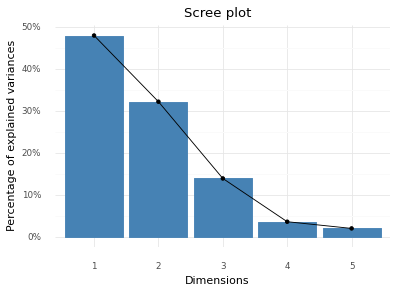

In [5]:
p = fviz_screeplot(res_partialpca)
print(p)

## Individuals

### Color by RGB color

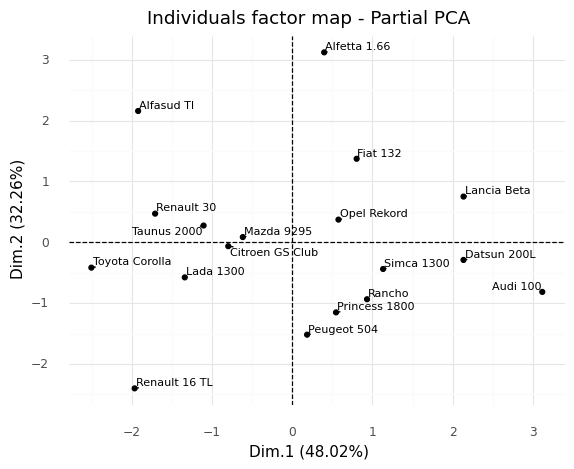

In [6]:
p = fviz_partialpca_ind(res_partialpca,repel=True)
print(p)

### Color by cos2

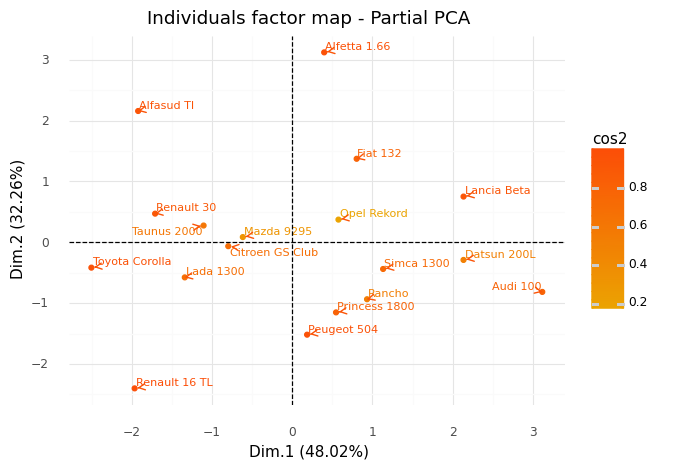

In [7]:
p = fviz_partialpca_ind(res_partialpca,color="cos2",repel=True)
print(p)

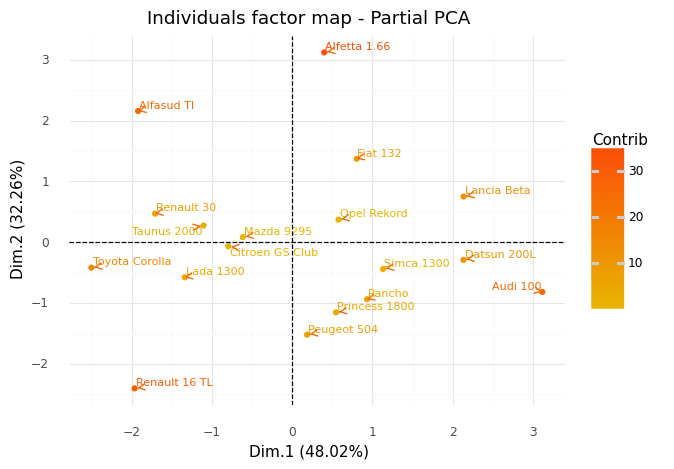

In [8]:
p = fviz_partialpca_ind(res_partialpca,color="contrib",repel=True)
print(p)

### Color by quantitative columns

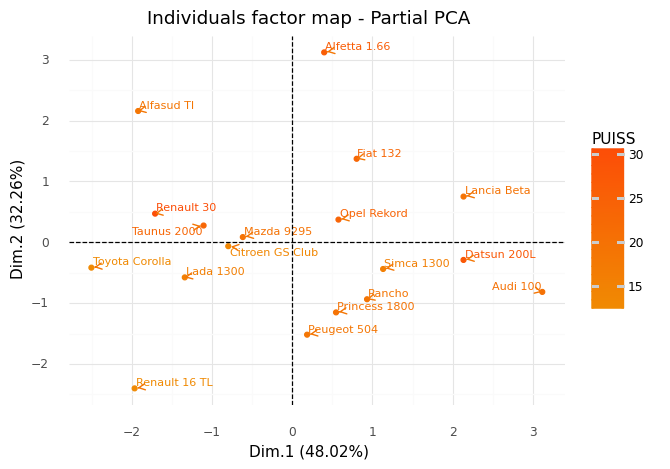

In [9]:
p = fviz_partialpca_ind(res_partialpca,color="PUISS",repel=True)
print(p)

### Color by numpy array

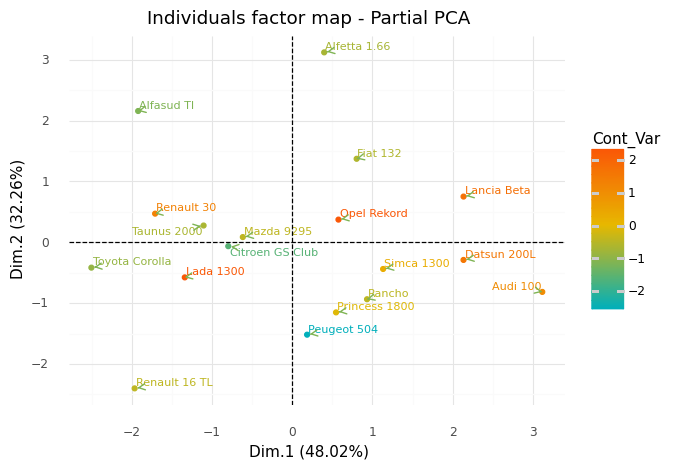

In [10]:
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=res_partialpca.call_["X"].shape[0])
p = fviz_partialpca_ind(res_partialpca,color=color_numpy,repel=True)
print(p)

### Color by kmeans clustering

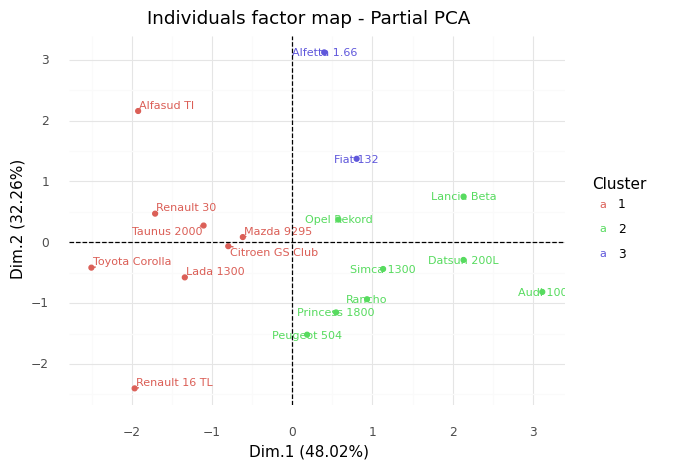

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_partialpca.ind_["coord"])
p = fviz_partialpca_ind(res_partialpca,color=kmeans,repel=True)
print(p)

### Set limit

#### limit cos2

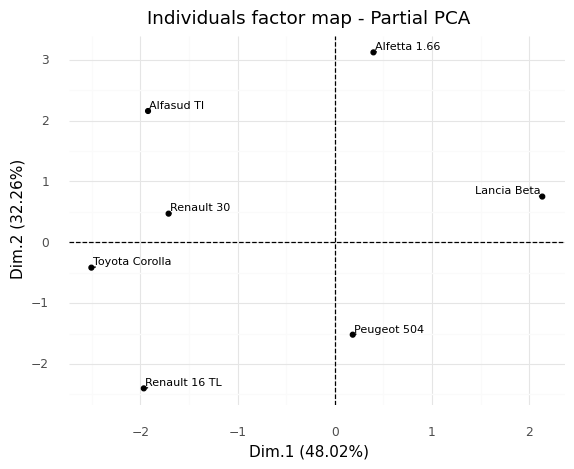

In [12]:
p = fviz_partialpca_ind(res_partialpca,lim_cos2=0.8,repel=True)
print(p)

#### limit contrib

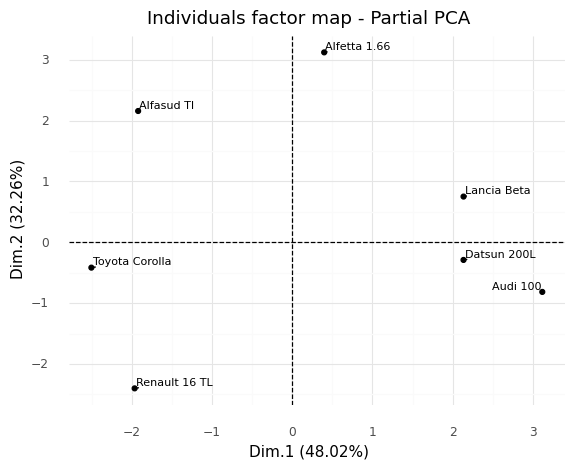

In [13]:
p = fviz_partialpca_ind(res_partialpca,lim_contrib=10,repel=True)
print(p)

## Variables Factor Map

### Color by RGB color

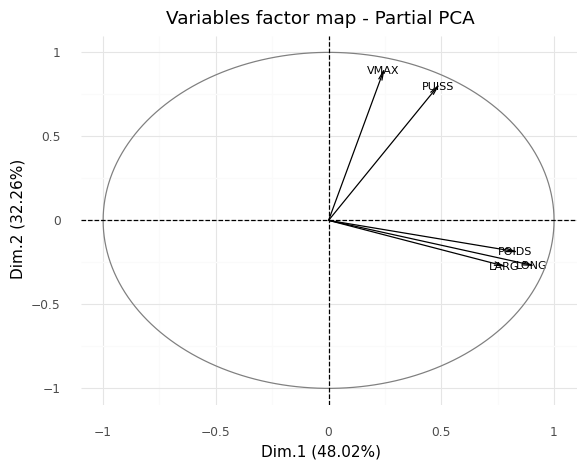

In [14]:
from scientisttools.ggplot import fviz_partialpca_var
p = fviz_partialpca_var(res_partialpca)
print(p)

### Color by cos2

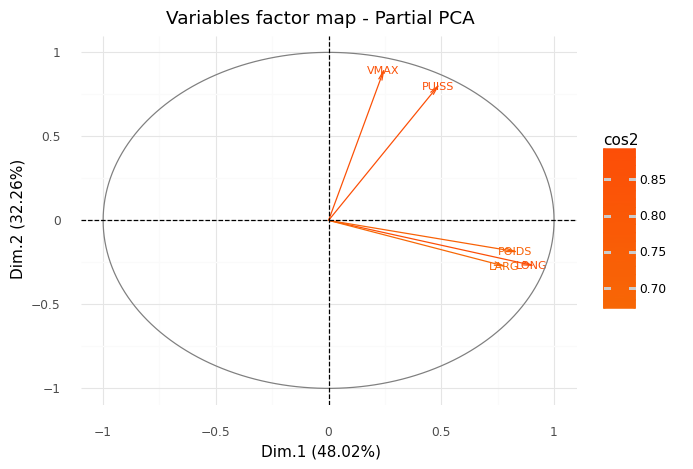

In [15]:
p = fviz_partialpca_var(res_partialpca,color="cos2")
print(p)

### Color by contrib

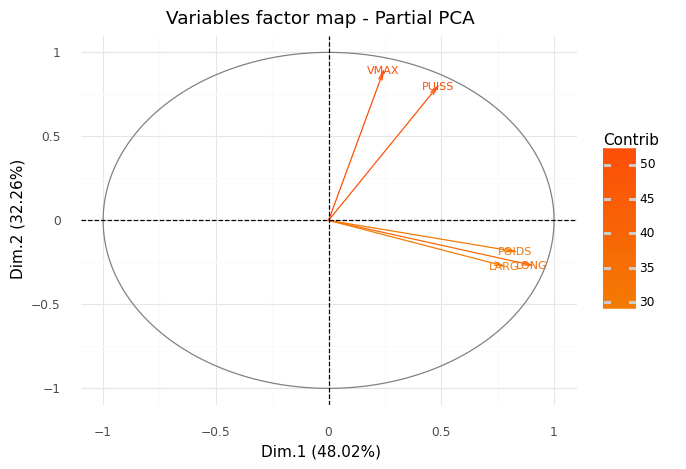

In [16]:
p = fviz_partialpca_var(res_partialpca,color="contrib")
print(p)

### Color by numpy array

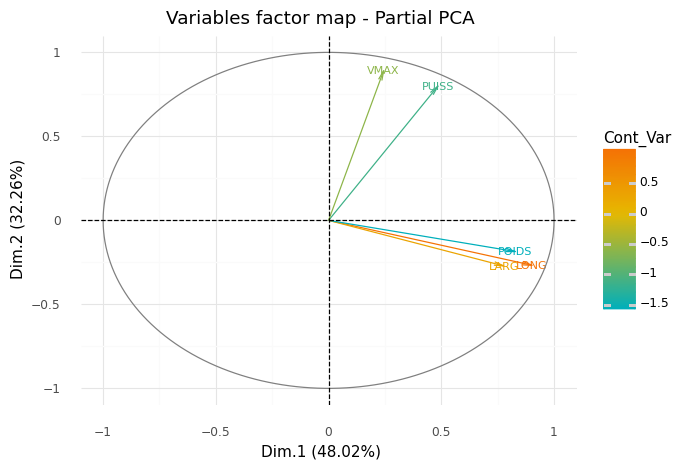

In [17]:
np.random.seed(123)
color_numpy = np.random.normal(size=res_partialpca.call_["resid"].shape[1])
p = fviz_partialpca_var(res_partialpca,color=color_numpy)
print(p)

### Color by kmeans clustering

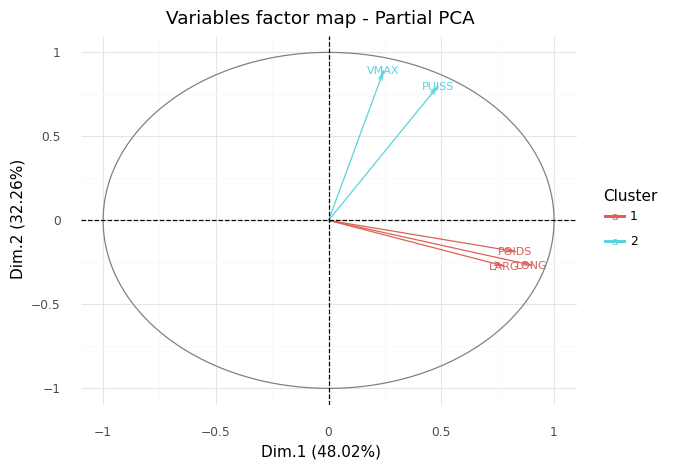

In [18]:
kmeans = KMeans(n_clusters=2, random_state=np.random.seed(123), n_init="auto").fit(res_partialpca.var_["coord"])
p = fviz_partialpca_var(res_partialpca,color=kmeans)
print(p)

### Set limit

#### limit cos2

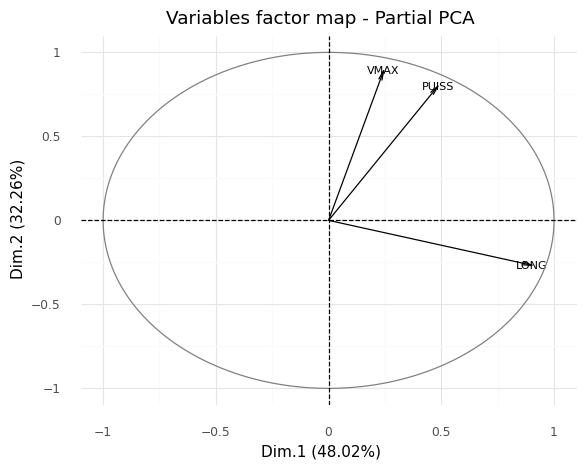

In [19]:
p = fviz_partialpca_var(res_partialpca,lim_cos2=0.85)
print(p)

#### Limit contrib

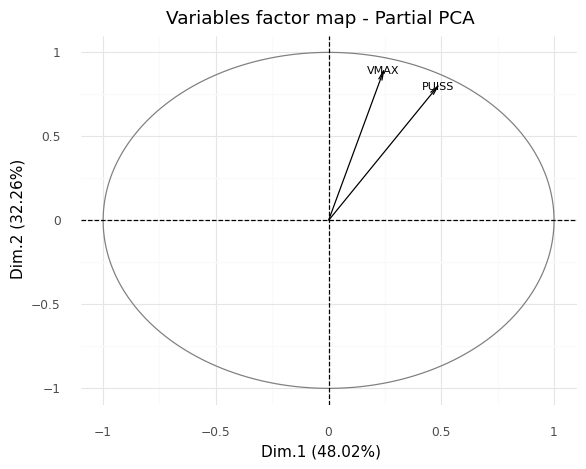

In [20]:
p = fviz_partialpca_var(res_partialpca,lim_contrib=40)
print(p)

## Plot contrib

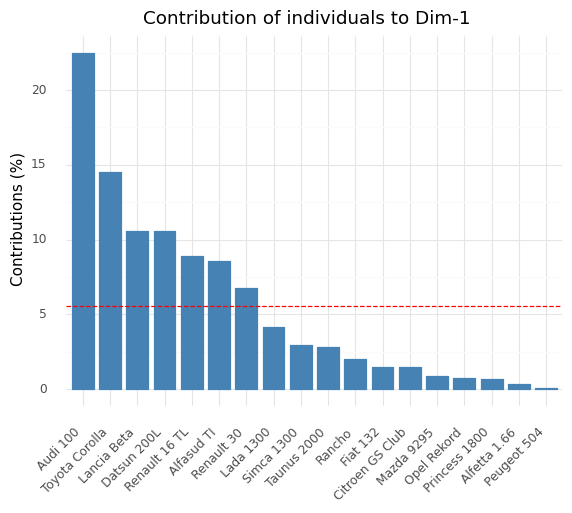

In [21]:
from scientisttools.ggplot import fviz_contrib
p = fviz_contrib(res_partialpca,choice="ind")
print(p)

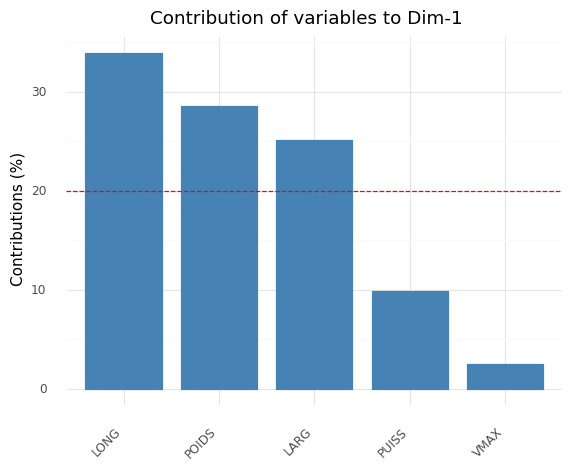

In [22]:
p = fviz_contrib(res_partialpca,choice="var")
print(p)